# 🚦 Traffic Data Analysis: Enhancing Urban Mobility and Planning







## Introduction

Urban areas worldwide face increasing traffic congestion, impacting productivity, environmental quality, and overall quality of life. Analyzing traffic flow patterns is essential for effective urban planning and improving transportation infrastructure.

This project explores a comprehensive traffic dataset containing hourly vehicle counts collected from multiple junctions. Our primary goal is to gain insights into traffic behaviors, such as identifying peak hours, detecting seasonal and daily patterns, and highlighting differences between various junctions.

Through **Exploratory Data Analysis (EDA)**, we aim to answer critical questions like:

- Which junctions experience the heaviest traffic?
- What are the peak traffic hours, and how do they differ across days of the week?
- Can we detect clear temporal patterns or anomalies in traffic volumes?

These insights can inform urban planners, help manage congestion effectively, and ultimately improve mobility and sustainability within the city.

Let's dive into the data and start uncovering valuable insights!

## 🎯 Research Objectives

Our analysis aims to achieve the following objectives:

1. **Analyze Traffic Patterns**
   - Identify hourly, daily, and monthly variations in traffic volume.

2. **Identify Peak Traffic Periods**
   - Pinpoint peak congestion hours and days, comparing weekday and weekend patterns.

3. **Compare Junctions**
   - Investigate differences in vehicle traffic among various junctions to understand congestion hotspots.

4. **Detect Temporal Trends and Seasonality**
   - Examine trends, seasonality, and recurring patterns within the dataset to anticipate future traffic scenarios.

5. **Highlight Anomalies**
   - Identify any irregularities or unexpected events in traffic flows that may require further investigation or intervention.

By achieving these objectives, we aim to provide actionable insights for better urban planning, improved traffic management, and enhanced mobility.

## Data Understanding and Preprocessing

## 📌 Data Overview



This dataset, titled **"Traffic Prediction Dataset"**, was sourced from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset). It contains traffic data collected hourly from four different junctions within an urban area. The data spans from **November 1, 2015**, to **June 30, 2017**, providing a substantial historical record to analyze urban mobility patterns.

### Dataset Attributes:

- **DateTime**: Represents the specific date and time (hourly intervals) when the data was recorded.
- **Junction**: Indicates the junction number (from 1 to 4) where vehicles were counted.
- **Vehicles**: Shows the total number of vehicles passing through the junction during each recorded hour.
- **ID**: A unique identifier for each record, constructed from the date and time information.

The primary goal of analyzing this dataset is to understand the traffic flow dynamics, identify patterns or congestion points, and potentially forecast future traffic volumes to improve urban planning and mobility strategies.

Let's begin by exploring and preparing our data for further analysis!

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data = pd.read_csv("traffic.csv")
data.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

### Data Exploration

In [3]:
data["DateTime"]= pd.to_datetime(data["DateTime"])
data = data.drop(["ID"], axis=1) #dropping IDs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

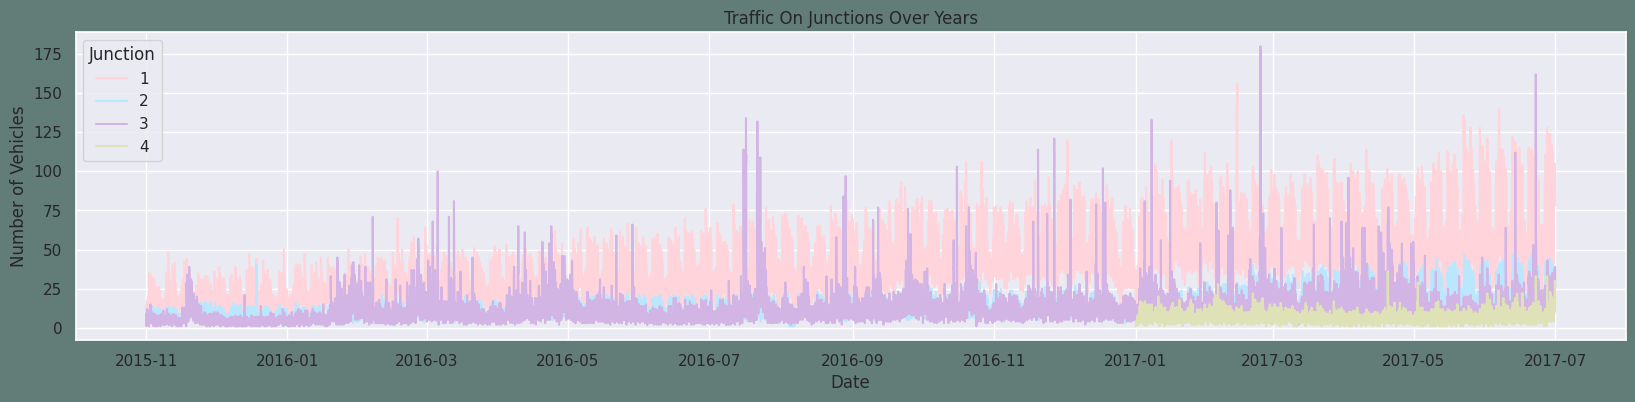

In [5]:
# #df to be used for EDA
df=data.copy()
# #Let's plot the Timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4),facecolor="#627D78")
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

### Feature Engineering

In [6]:
df["Year"] = df['DateTime'].dt.year
df["Month"] = df['DateTime'].dt.month
df["Date_no"] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df.head()

DateTime  Junction  Vehicles  Year  Month  Date_no  Hour  Day
0 2015-11-01 00:00:00         1        15  2015     11        1     0    1
1 2015-11-01 01:00:00         1        13  2015     11        1     1    1
2 2015-11-01 02:00:00         1        10  2015     11        1     2    1
3 2015-11-01 03:00:00         1         7  2015     11        1     3    1
4 2015-11-01 04:00:00         1         9  2015     11        1     4    1

### Exploratory Data Analysis

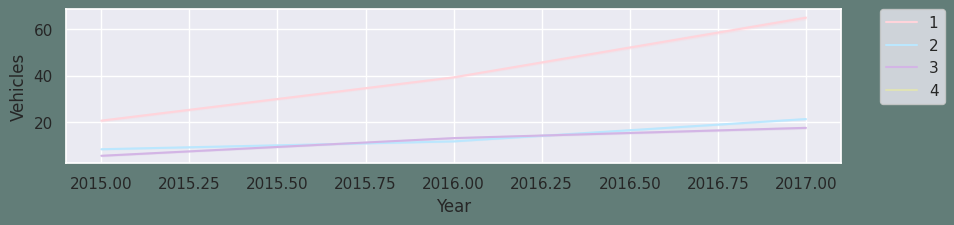

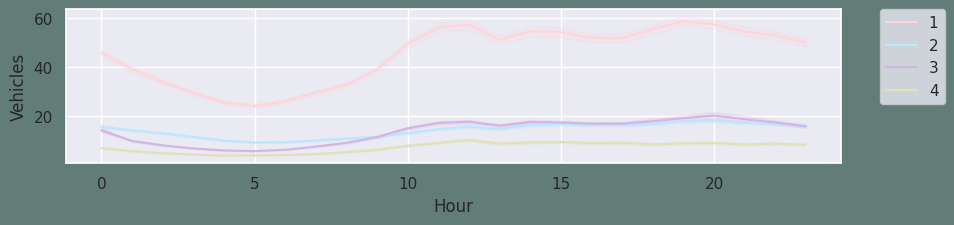

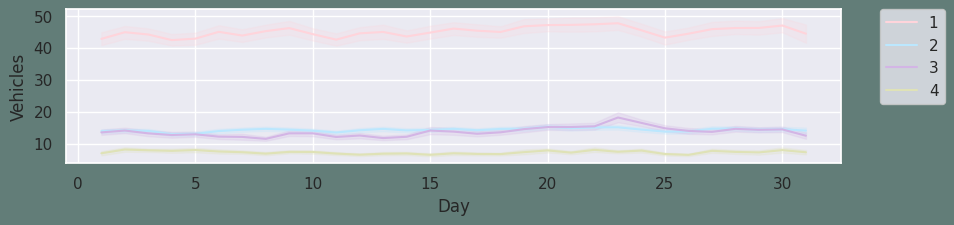

In [ ]:
#Let's plot the Timeseries
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10,2),facecolor="#627D78")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 0, 'Date')

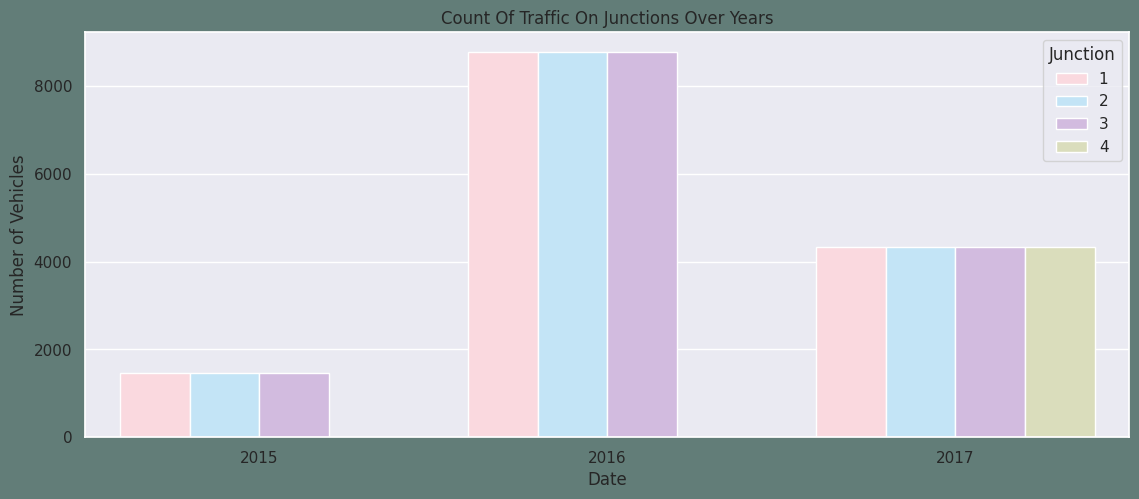

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

<Axes: >

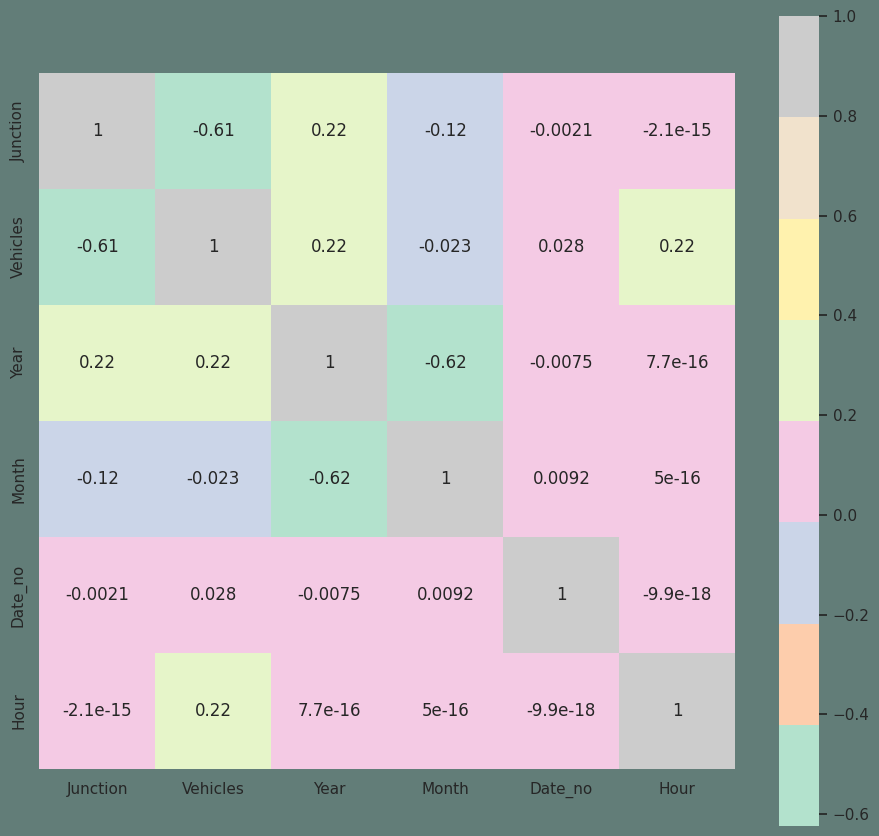

In [ ]:
corrmat = df.drop(columns=["Day", 'DateTime']).corr()
plt.subplots(figsize=(10,10),facecolor="#627D78")
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )

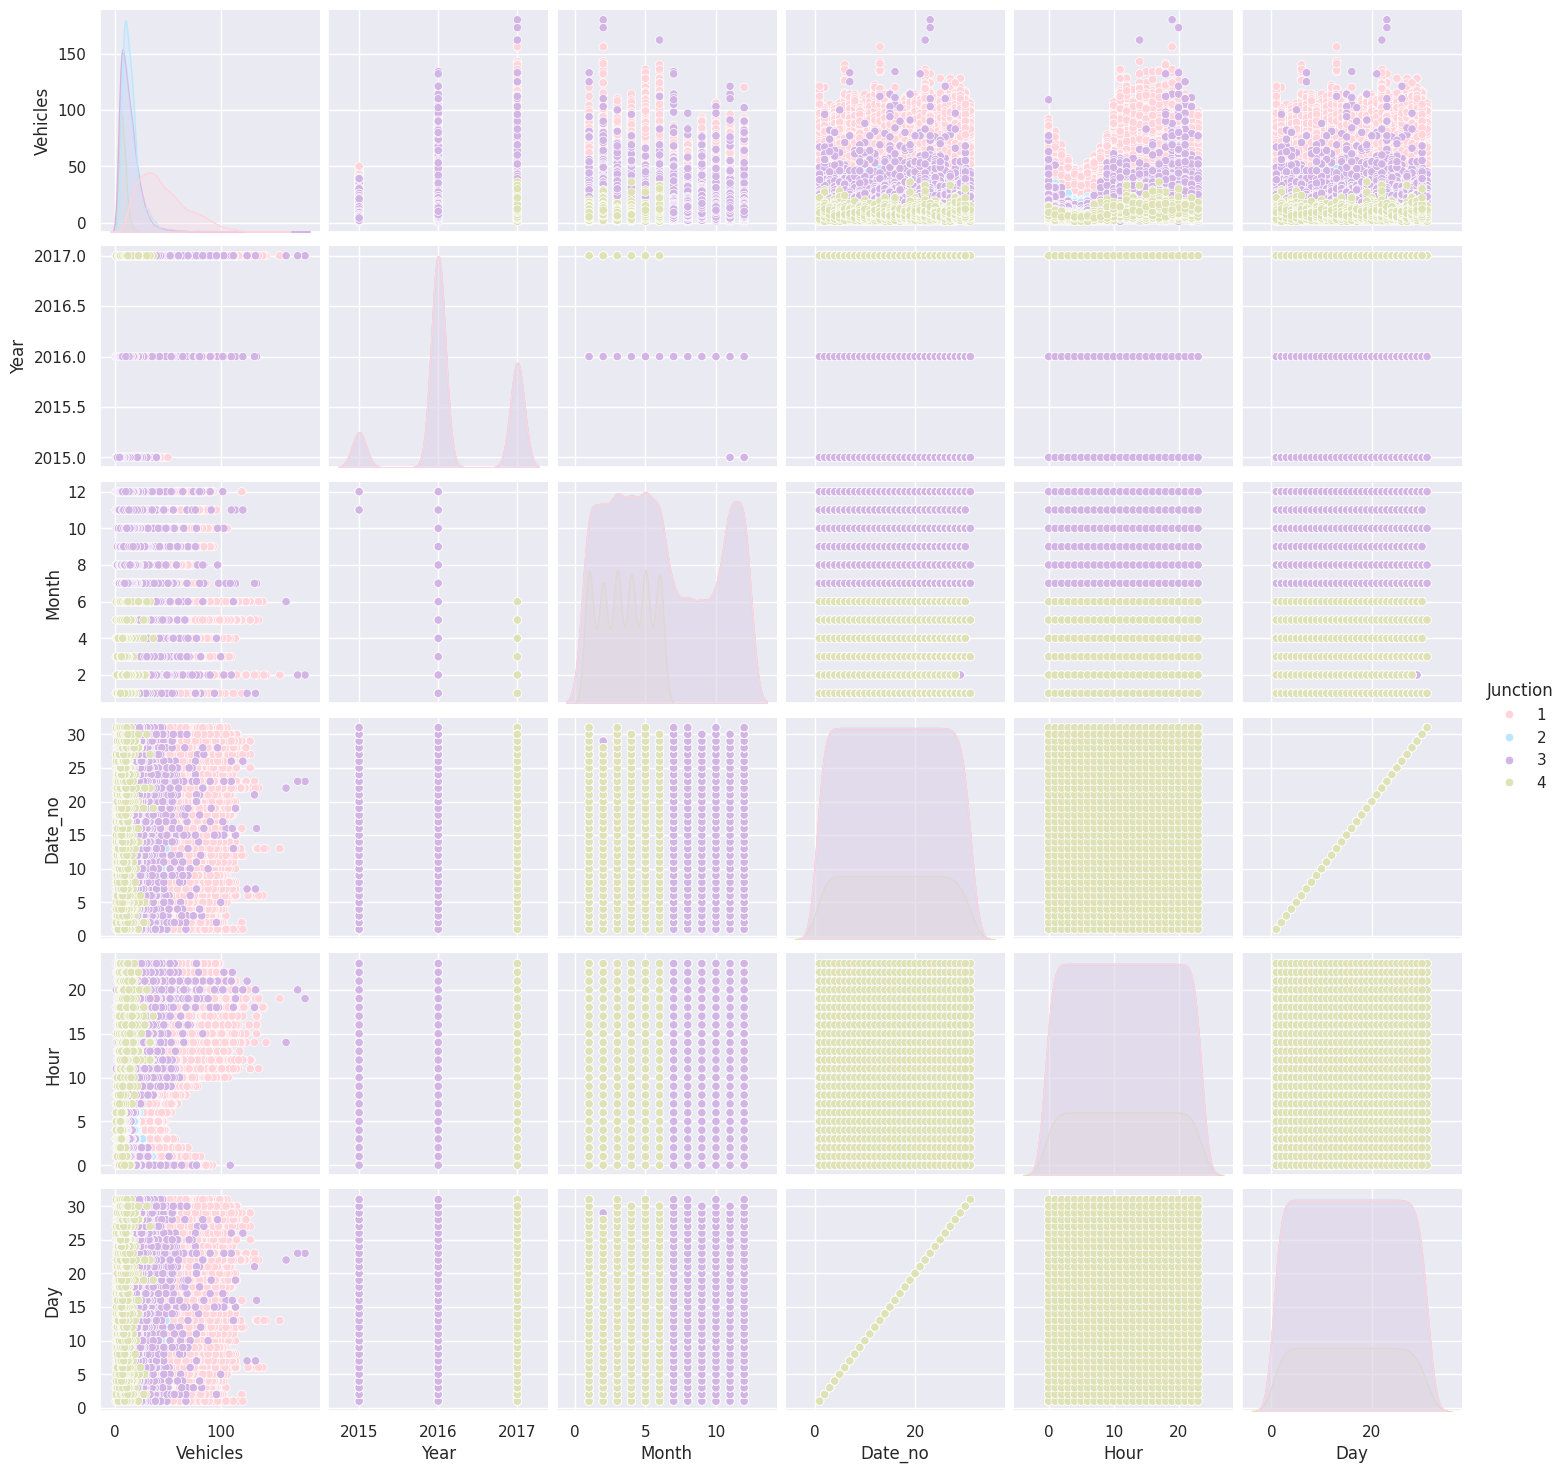

In [ ]:
sns.pairplot(data=df, hue= "Junction",palette=colors)

### Data Transformation And Preprocessing

In [7]:
#Pivoting data fron junction
df_J = data.pivot(columns="Junction", index="DateTime")
df_J.describe()

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

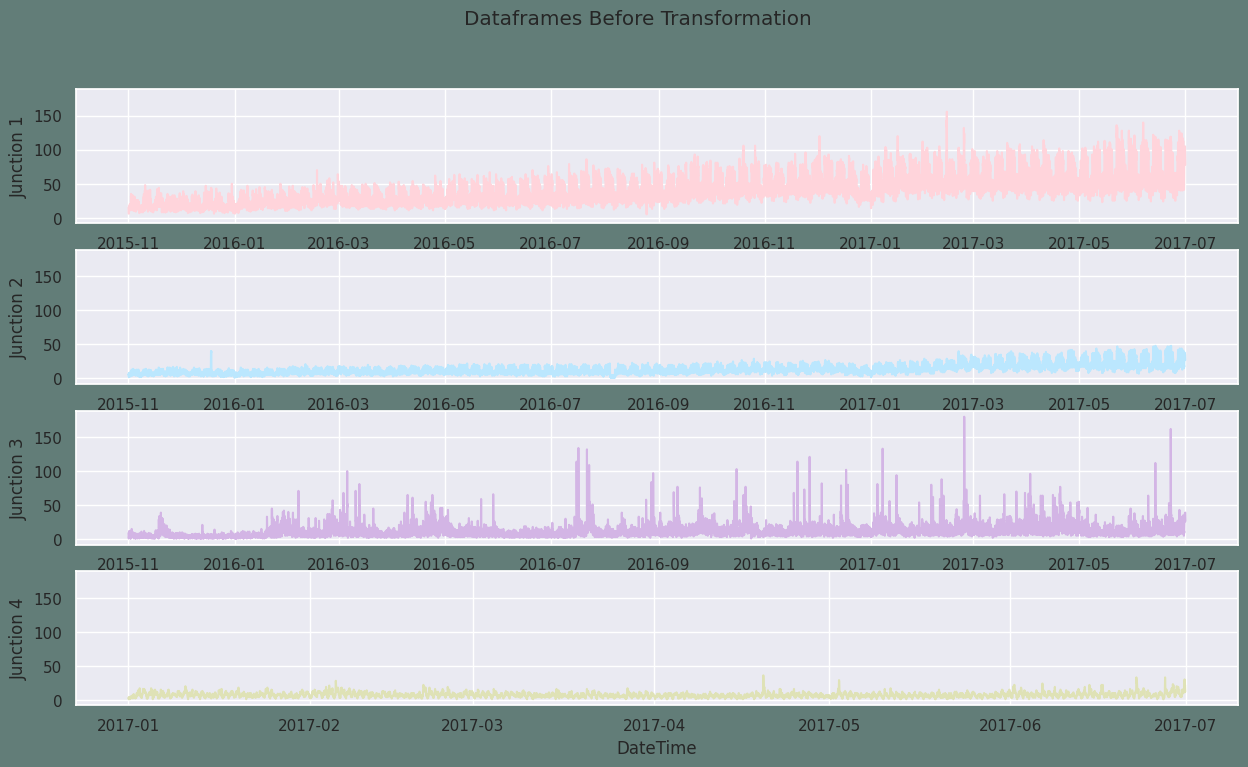

In [8]:
#Creating new sets
df_1 = df_J[[('Vehicles', 1)]]
df_2 = df_J[[('Vehicles', 2)]]
df_3 = df_J[[('Vehicles', 3)]]
df_4 = df_J[[('Vehicles', 4)]]
df_4 = df_4.dropna() #Junction 4 has limited data only for a few months

#Dropping level one in dfs's index as it is a multi index data frame
list_dfs = [df_1, df_2, df_3, df_4]
for i in list_dfs:
    i.columns= i.columns.droplevel(level=1)

#Function to plot comparitive plots of dataframes
def Sub_Plots4(df_1, df_2,df_3,df_4,title):
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_1,color=colors[0])
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 1")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_2,color=colors[1])
    axes[1].set(ylabel ="Junction 2")
    #J3
    pl_3=sns.lineplot(ax=axes[2],data=df_3,color=colors[2])
    axes[2].set(ylabel ="Junction 3")
    #J4
    pl_4=sns.lineplot(ax=axes[3],data=df_4,color=colors[3])
    axes[3].set(ylabel ="Junction 4")


#Plotting the dataframe to check for stationarity
Sub_Plots4(df_1.Vehicles, df_2.Vehicles,df_3.Vehicles,df_4.Vehicles,"Dataframes Before Transformation")

In [9]:
# Normalize Function
def Normalize(df,col):
    average = df[col].mean()
    stdev = df[col].std()
    df_normalized = (df[col] - average) / stdev
    df_normalized = df_normalized.to_frame()
    return df_normalized, average, stdev

# Differencing Function
def Difference(df,col, interval):
    diff = []
    for i in range(interval, len(df)):
        value = df[col][i] - df[col][i - interval]
        diff.append(value)
    return diff

In [10]:
#Normalizing and Differencing to make the series stationary
df_N1, av_J1, std_J1 = Normalize(df_1, "Vehicles")
Diff_1 = Difference(df_N1, col="Vehicles", interval=(24*7)) #taking a week's diffrence
df_N1 = df_N1[24*7:]
df_N1.columns = ["Norm"]
df_N1["Diff"]= Diff_1

df_N2, av_J2, std_J2 = Normalize(df_2, "Vehicles")
Diff_2 = Difference(df_N2, col="Vehicles", interval=(24)) #taking a day's diffrence
df_N2 = df_N2[24:]
df_N2.columns = ["Norm"]
df_N2["Diff"]= Diff_2

df_N3, av_J3, std_J3 = Normalize(df_3, "Vehicles")
Diff_3 = Difference(df_N3, col="Vehicles", interval=1) #taking an hour's diffrence
df_N3 = df_N3[1:]
df_N3.columns = ["Norm"]
df_N3["Diff"]= Diff_3

df_N4, av_J4, std_J4 = Normalize(df_4, "Vehicles")
Diff_4 = Difference(df_N4, col="Vehicles", interval=1) #taking an hour's diffrence
df_N4 = df_N4[1:]
df_N4.columns = ["Norm"]
df_N4["Diff"]= Diff_4

<ipython-input-9-336864d135dc>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
<ipython-input-10-51063ce89974>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_N1["Diff"]= Diff_1
<ipython-input-9-336864d135dc>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df[col][i] - df[col][i - interval]
<ipython-input-10-51063ce8997

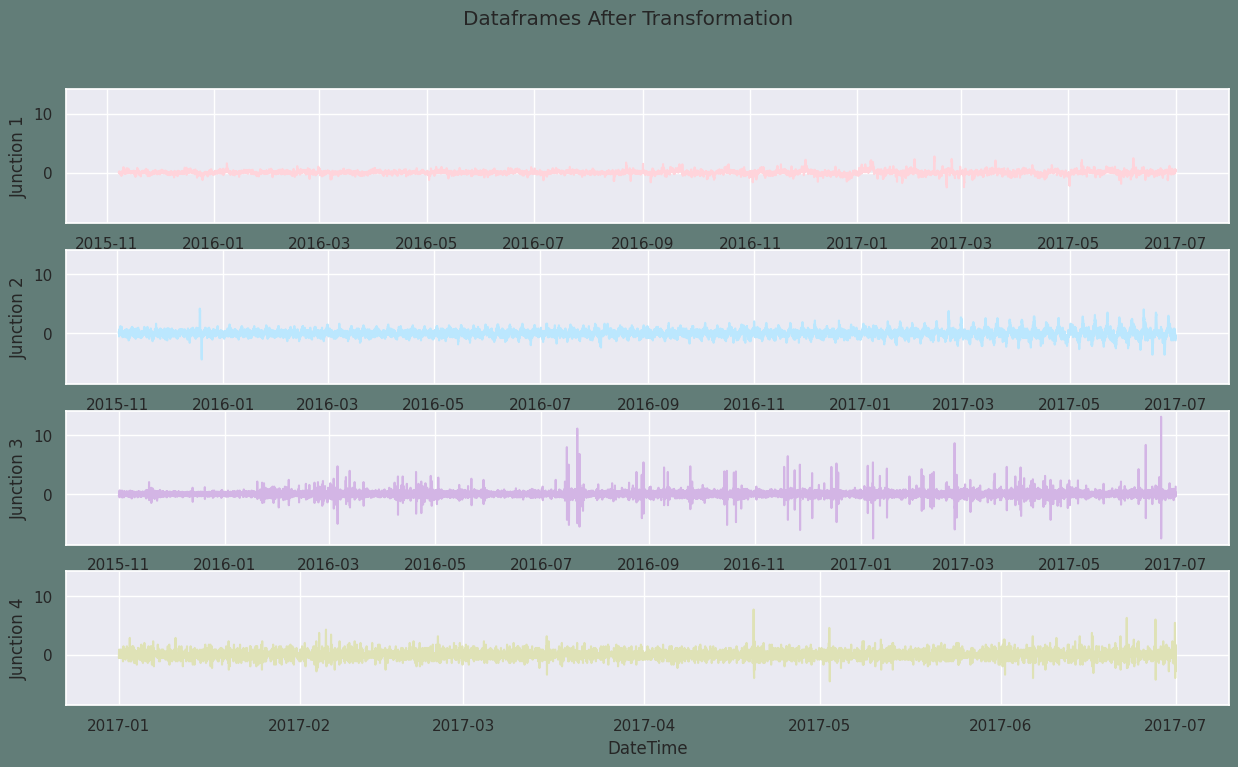

In [13]:
Sub_Plots4(df_N1.Diff, df_N2.Diff,df_N3.Diff,df_N4.Diff,"Dataframes After Transformation")

In [11]:
#Stationary Check for the time series Augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

def Stationary_check(df):
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary")


#Checking if the series is stationary

List_df_ND = [ df_N1["Diff"], df_N2["Diff"], df_N3["Diff"], df_N4["Diff"]]
print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -15.26530339041543
p-value: 4.798539876396819e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694008
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.001759908832607
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305226
p-value: 2.7787875325955e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [12]:
#Differencing created some NA values as we took a weeks data into consideration while difrencing
df_J1 = df_N1["Diff"].dropna()
df_J1 = df_J1.to_frame()

df_J2 = df_N2["Diff"].dropna()
df_J2 = df_J2.to_frame()

df_J3 = df_N3["Diff"].dropna()
df_J3 = df_J3.to_frame()

df_J4 = df_N4["Diff"].dropna()
df_J4 = df_J4.to_frame()

# Model Building

## ARIMA

### Import Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Checking Stationary

In [14]:
# Perform the Augmented Dickey-Fuller test on the original series
daily_traffic = df_1['Vehicles'].resample('D').sum()
daily_traffic_df = daily_traffic.to_frame().copy()
result_original = adfuller(daily_traffic_df)

print(f"ADF Statistic (Original): {result_original[0]:.4f}")
print(f"p-value (Original): {result_original[1]:.4f}")

if result_original[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

# Apply first-order differencing
daily_traffic_df['Vehicles_Diff'] = daily_traffic_df.diff()

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(daily_traffic_df["Vehicles_Diff"].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]:.4f}")
print(f"p-value (Differenced): {result_diff[1]:.4f}")
if result_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.")
else:
    print("Interpretation: The differenced series is Non-Stationary.")

ADF Statistic (Original): -0.3414
p-value (Original): 0.9194
Interpretation: The original series is Non-Stationary.

ADF Statistic (Differenced): -8.9226
p-value (Differenced): 0.0000
Interpretation: The differenced series is Stationary.


### Plotting the differenced Close price

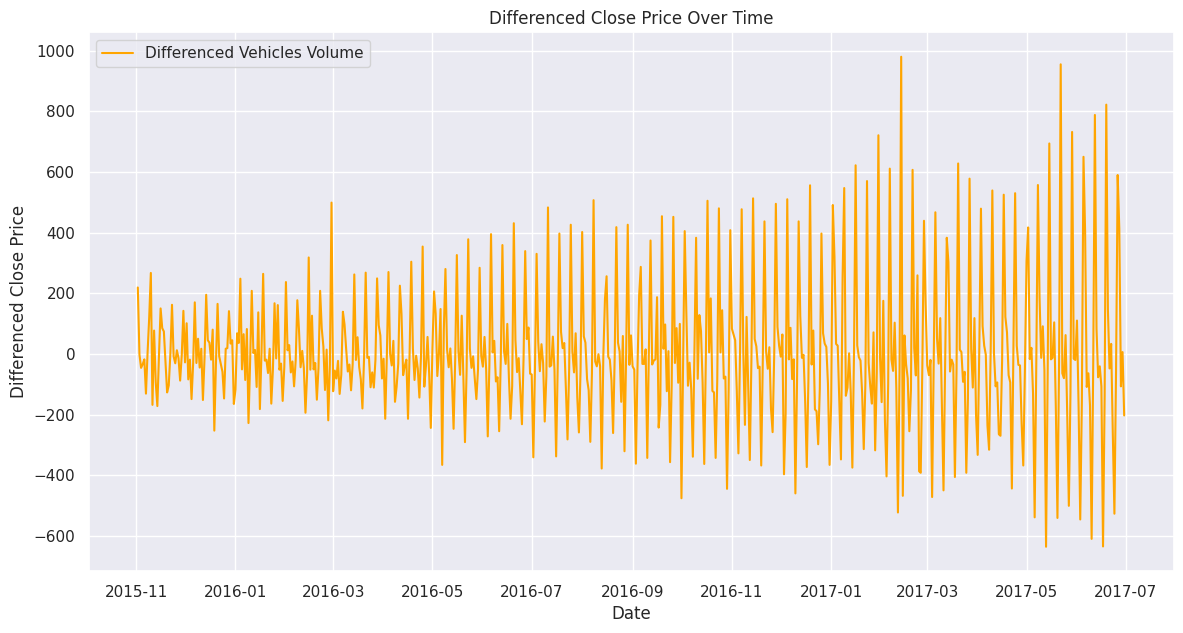

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(daily_traffic_df.index, daily_traffic_df['Vehicles_Diff'], label='Differenced Vehicles Volume', color='orange')
plt.title('Differenced Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.legend()
plt.show()

### Finding the ARIMA terms

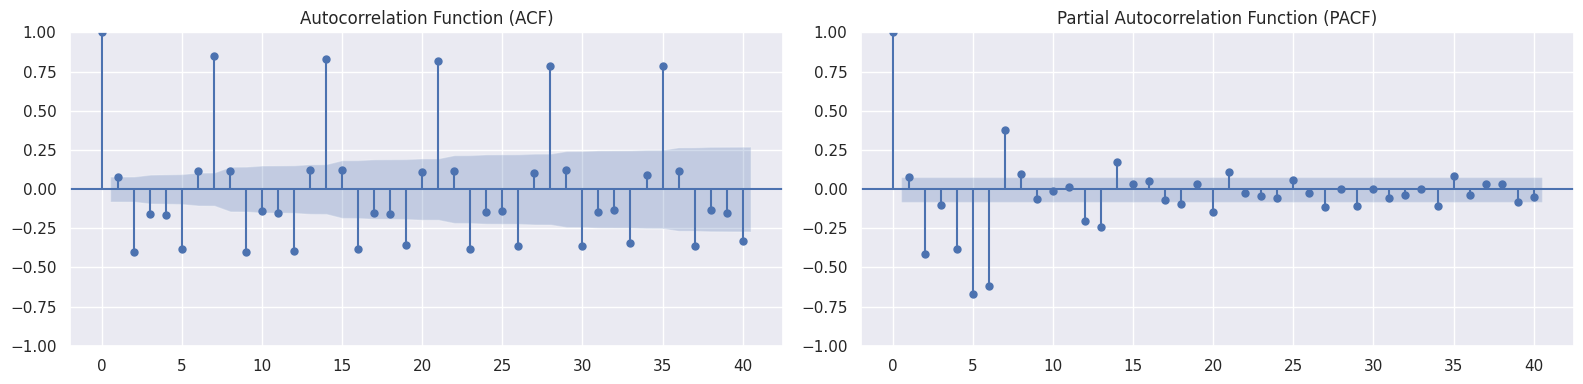

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# ACF plot
plot_acf(daily_traffic_df['Vehicles_Diff'].dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(daily_traffic_df['Vehicles_Diff'].dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

### Use a train/test workflow

In [23]:
# Split data into train and test
train_size = int(len(daily_traffic_df) * 0.8)
train, test = daily_traffic_df.iloc[:train_size], daily_traffic_df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['Vehicles'], order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### Visualize our time series

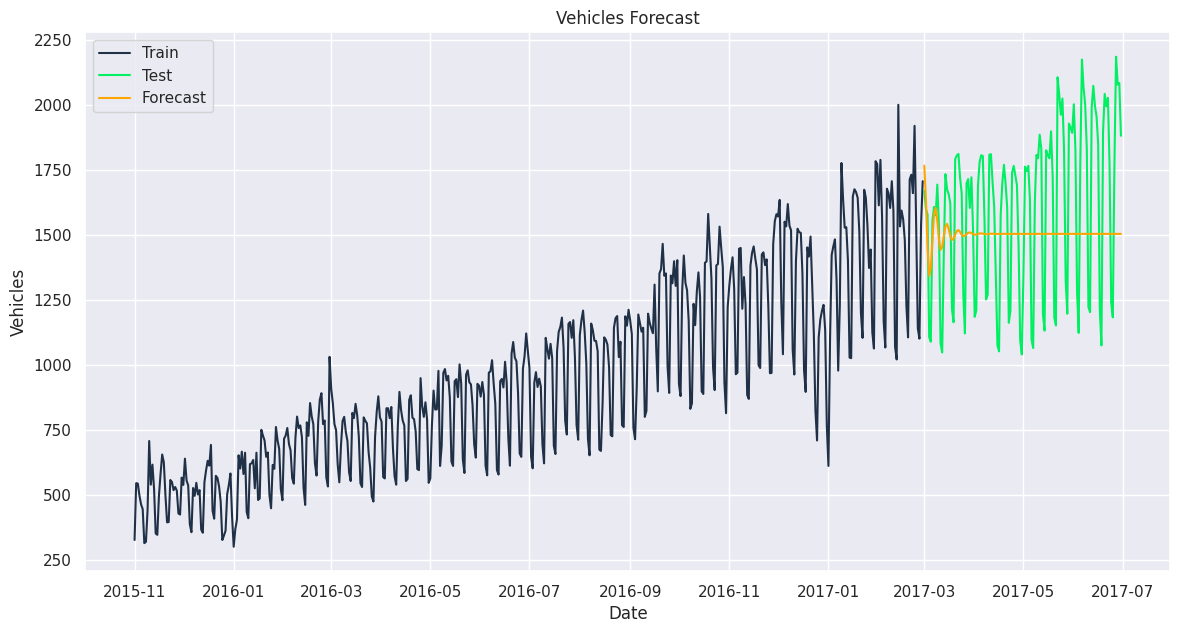

In [24]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train['Vehicles'], label='Train', color='#203147')
plt.plot(test.index, test['Vehicles'], label='Test', color='#01ef63')
plt.plot(test.index, forecast, label='Forecast', color='orange')
plt.title('Vehicles Forecast')
plt.xlabel('Date')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

### Evaluate model statistics

In [25]:
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

AIC: 6236.27271104327
BIC: 6257.193455497957


In [26]:
forecast = forecast[:len(test)]
test = test["Vehicles"][:len(forecast)]

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
r2 = r2_score(test, forecast)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 296.5924
MSE: 109193.5676
RMSE: 330.4445
R² Score: -0.0763


## SARIMA

In [27]:
train_d = daily_traffic[:-30]
test_d = daily_traffic[-30:]

### Fit SARIMA model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(train_d, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit()

### Plot train, test, and forecast

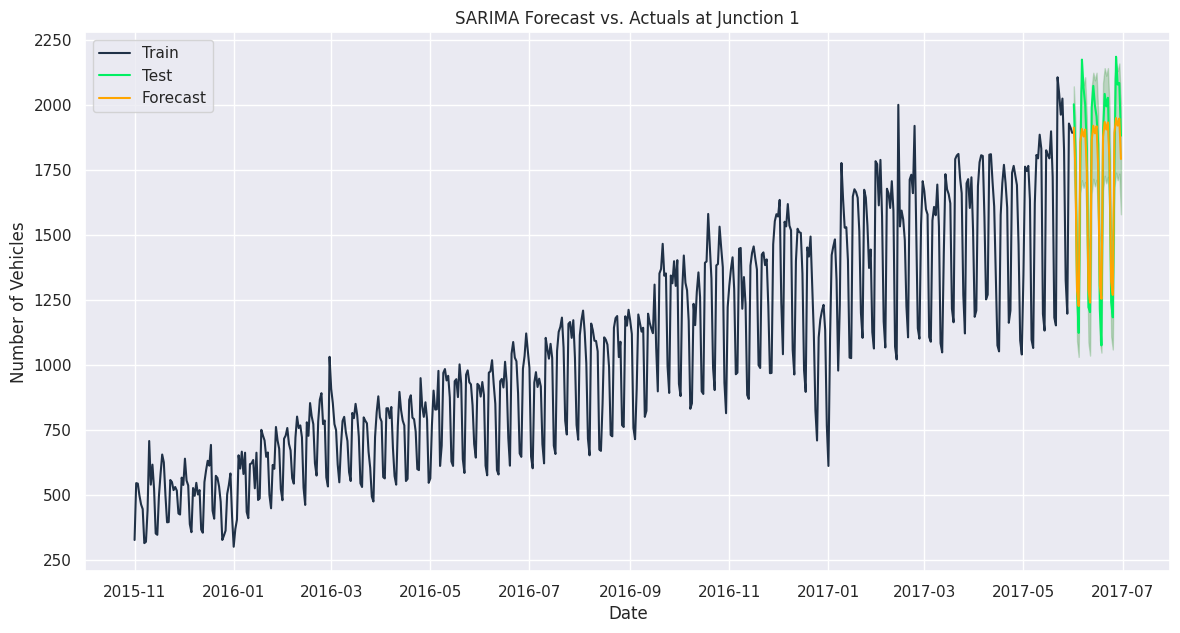

In [30]:
forecast_steps = len(test_d)
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = sarima_forecast.predicted_mean
forecast_ci = sarima_forecast.conf_int()

plt.figure(figsize=(14, 7))
plt.plot(train_d.index, train_d.values, label='Train', color='#203147')
plt.plot(test_d.index, test_d.values, label='Test', color='#01ef63')
plt.plot(forecast_mean.index, forecast_mean.values, label='Forecast', color='orange')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('SARIMA Forecast vs. Actuals at Junction 1')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

### Forecast next 30 days

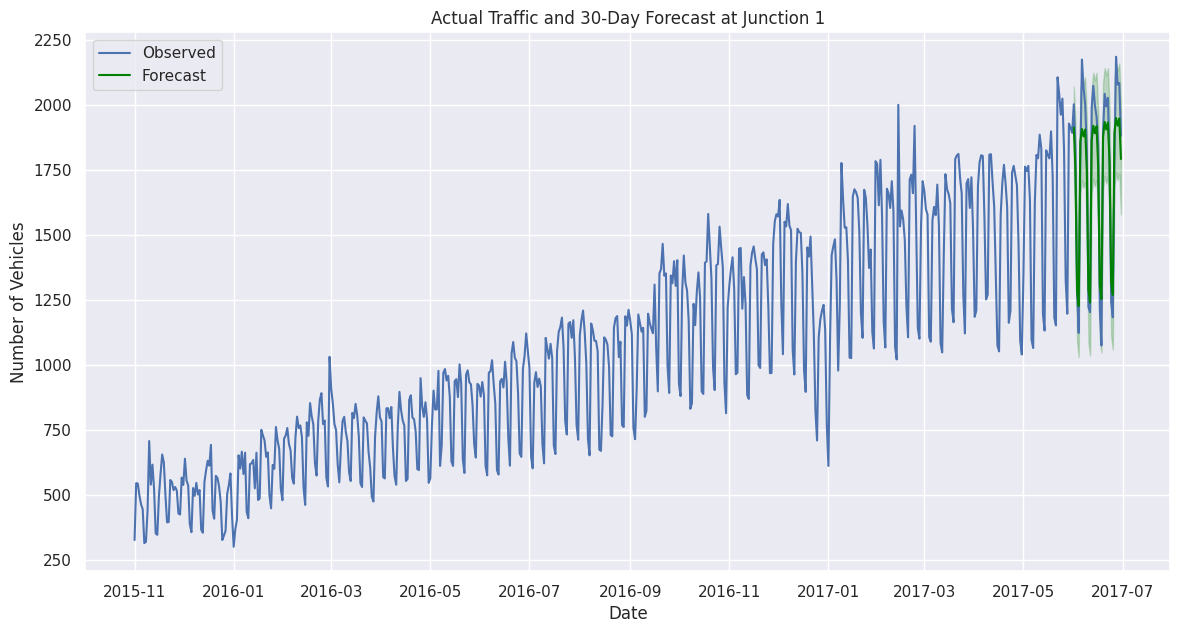

In [31]:
forecast_steps = 30
sarima_forecast = sarima_fit.get_forecast(steps=forecast_steps)
forecast_mean = sarima_forecast.predicted_mean
forecast_ci = sarima_forecast.conf_int()

# Plot actual data + forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_traffic, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.2)
plt.title('Actual Traffic and 30-Day Forecast at Junction 1')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

### Evaluate model

In [32]:
forecast = forecast[:len(test_d)]
test_d = test_d[:len(forecast)]

mae = mean_absolute_error(test_d, forecast_mean)
mse = mean_squared_error(test_d, forecast_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_d, forecast_mean)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 103.3907
MSE: 14163.0229
RMSE: 119.0085
R² Score: 0.8906


## Random Forest Regressor

###  Selecting features and target variable

In [ ]:
features = df[['Junction', "Year", "Month", "Date_no", "Hour", "Day"]]
target = df['Vehicles']

### Splitting Splitting the data into training and testing sets

In [ ]:
df_J1.head()

Diff
DateTime                     
2015-11-08 00:00:00 -0.086925
2015-11-08 01:00:00  0.130387
2015-11-08 02:00:00  0.043462
2015-11-08 03:00:00  0.043462
2015-11-08 04:00:00  0.043462

In [ ]:
from sklearn.model_selection import train_test_split
# Filter the data for only Junction 1
junction_1 = df[df['Junction'] == 1]

# Splitting the filtered data into training and testing sets again
X_train_j1, X_test_j1, y_train_j1, y_test_j1 = train_test_split(
    junction_1[['Year', 'Month', 'Date_no', 'Hour', 'Day']],
    junction_1['Vehicles'],
    test_size=0.2,
    random_state=42
)

### Train the Random Forest Regressor

In [ ]:
%%time

from sklearn.ensemble import RandomForestRegressor
# Train the Random Forest Regressor on Junction 1 data
random_forest_j1 = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_j1.fit(X_train_j1, y_train_j1)

CPU times: user 2.63 s, sys: 67.7 ms, total: 2.7 s
Wall time: 2.69 s


RandomForestRegressor(random_state=42)

### Predict on the testing set

In [ ]:
# Predict on the Junction 1 testing set
y_pred_j1 = random_forest_j1.predict(X_test_j1)

### Calculate performance metrics

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_j1, y_pred_j1)
mae = mean_absolute_error(y_test_j1, y_pred_j1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_j1, y_pred_j1)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 3.8434
MSE: 27.1350
RMSE: 5.2091
R² Score: 0.9480


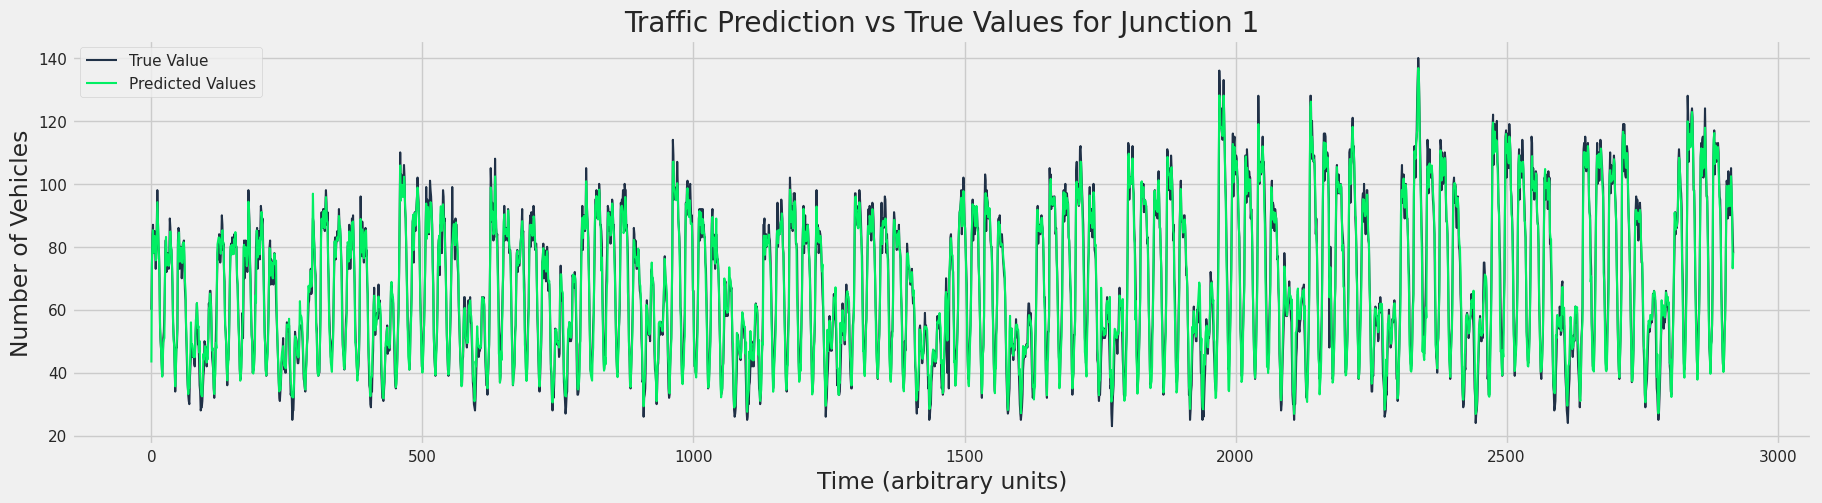

In [ ]:
# Create a DataFrame for plotting
junction_1_plot_data = pd.DataFrame({
    'Actual': y_test_j1,
    'Predicted': y_pred_j1
})
junction_1_plot_data.reset_index(drop=True, inplace=True)

# Plotting for Junction 1
plt.figure(figsize=(20, 5))
plt.plot(junction_1_plot_data['Actual'], label='True Value', color="#203147", linewidth=1.5)
plt.plot(junction_1_plot_data['Predicted'], label='Predicted Values', color="#01ef63",  linewidth=1.5)
plt.title('Traffic Prediction vs True Values for Junction 1')
plt.xlabel('Time (arbitrary units)')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

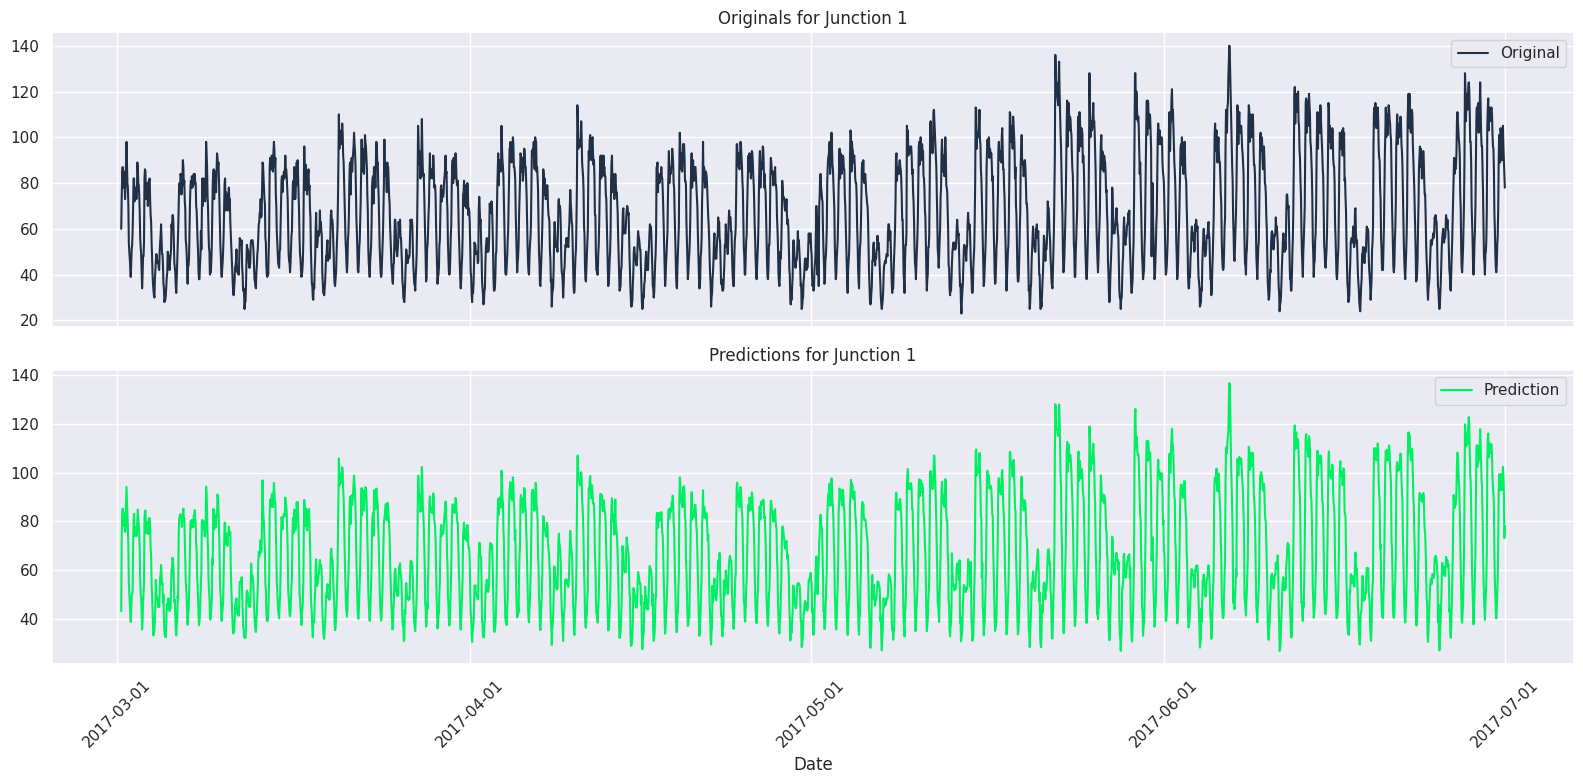

In [ ]:
from matplotlib import dates as mdates
# Since the 'DateTime' column was already set as the index and removed from the columns, we can directly use it
# Filtering the dataset for Junction 1
junction_1_data_filtered = df[df['Junction'] == 1]

# Splitting the filtered data into training and testing sets again for Junction 1
X_train_j1, X_test_j1, y_train_j1, y_test_j1 = train_test_split(
    junction_1_data_filtered[['Year', 'Month', 'Date_no', 'Hour', 'Day']],
    junction_1_data_filtered['Vehicles'],
    test_size=0.2,
    random_state=42,
    shuffle=False
)

# Predicting using the model for Junction 1
y_pred_j1 = random_forest_j1.predict(X_test_j1)

# Creating a DataFrame for plotting with actual datetime indices
predicted_j1_with_date = pd.Series(y_pred_j1, index=junction_1_data_filtered.loc[X_test_j1.index, 'DateTime'])

# Plotting predictions and actuals with dates
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharex=True)

# Actual Values Plot
axes[0].plot(junction_1_data_filtered.loc[X_test_j1.index, 'DateTime'], y_test_j1, label='Original', color='#203147', linewidth=1.5)
axes[0].set_title('Originals for Junction 1')
axes[0].legend()

# Prediction Values Plot
axes[1].plot(predicted_j1_with_date.index, predicted_j1_with_date, label='Prediction', color='#01ef63', linewidth=1.5)
axes[1].set_title('Predictions for Junction 1')
axes[1].legend()

# Setting up the date formatting
date_form = mdates.DateFormatter("%Y-%m-%d")
axes[1].xaxis.set_major_formatter(date_form)
axes[1].xaxis.set_major_locator(mdates.MonthLocator())

# Improving plot layout
plt.xticks(rotation=45)
plt.xlabel('Date')
fig.tight_layout()
plt.show()

## XGBoost

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Loading Dataset

In [ ]:
df = pd.read_csv('traffic.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

### Vechles Over Time Plot

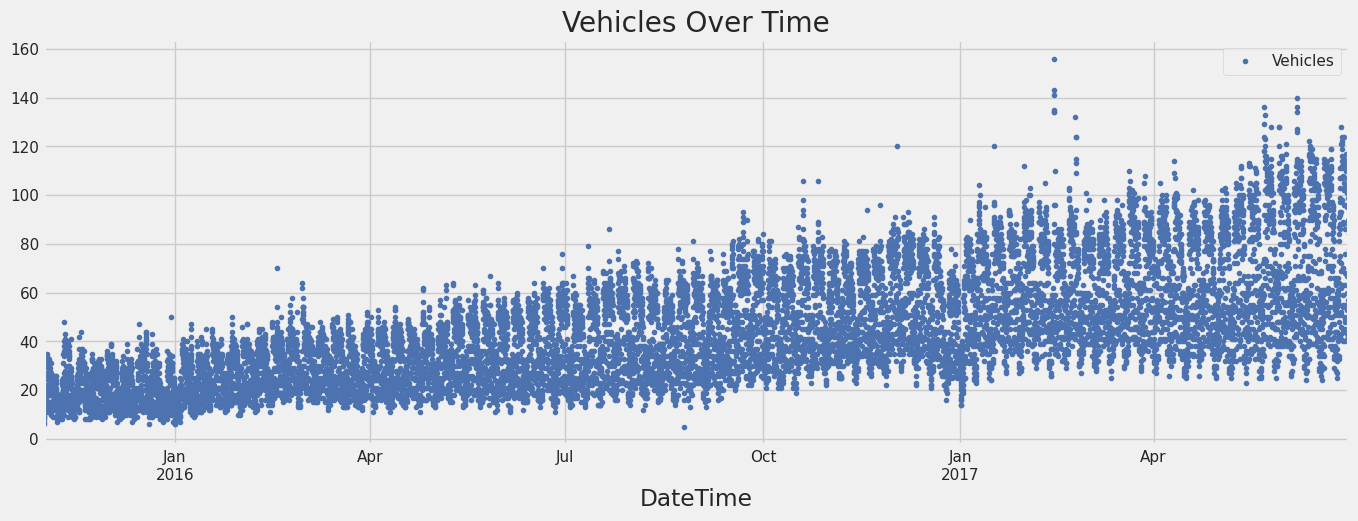

In [ ]:
df_1.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Vehicles Over Time')
plt.show()

### Traing/Test Split

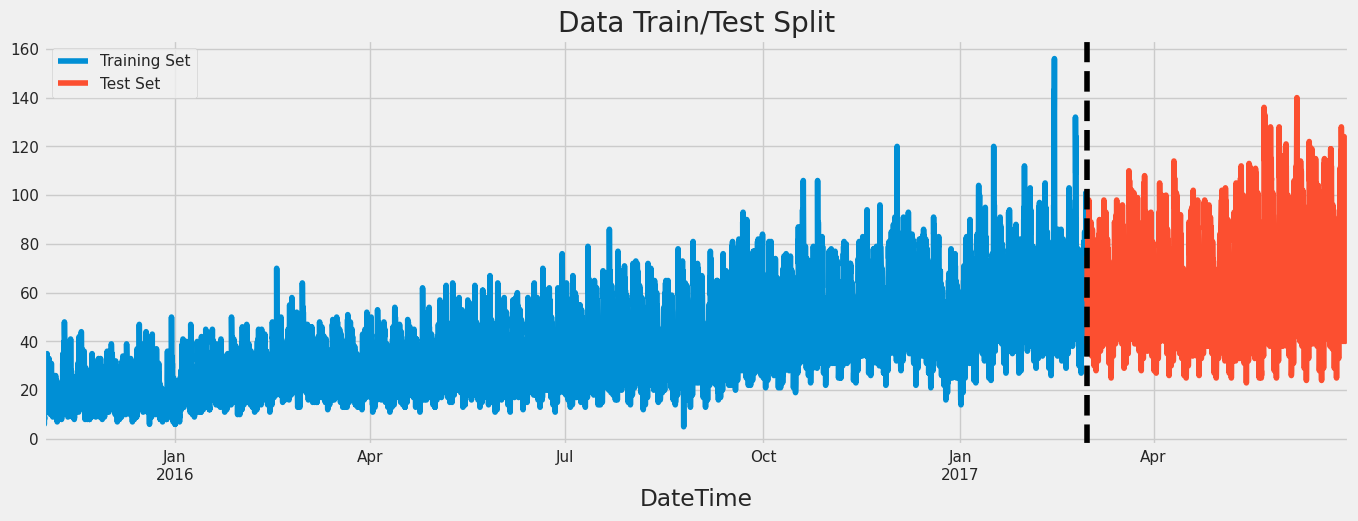

In [ ]:
train = df_1.loc[df_1.index < '03-01-2017']
test = df_1.loc[df_1.index >= '03-01-2017']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('03-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### Week of Data Plot

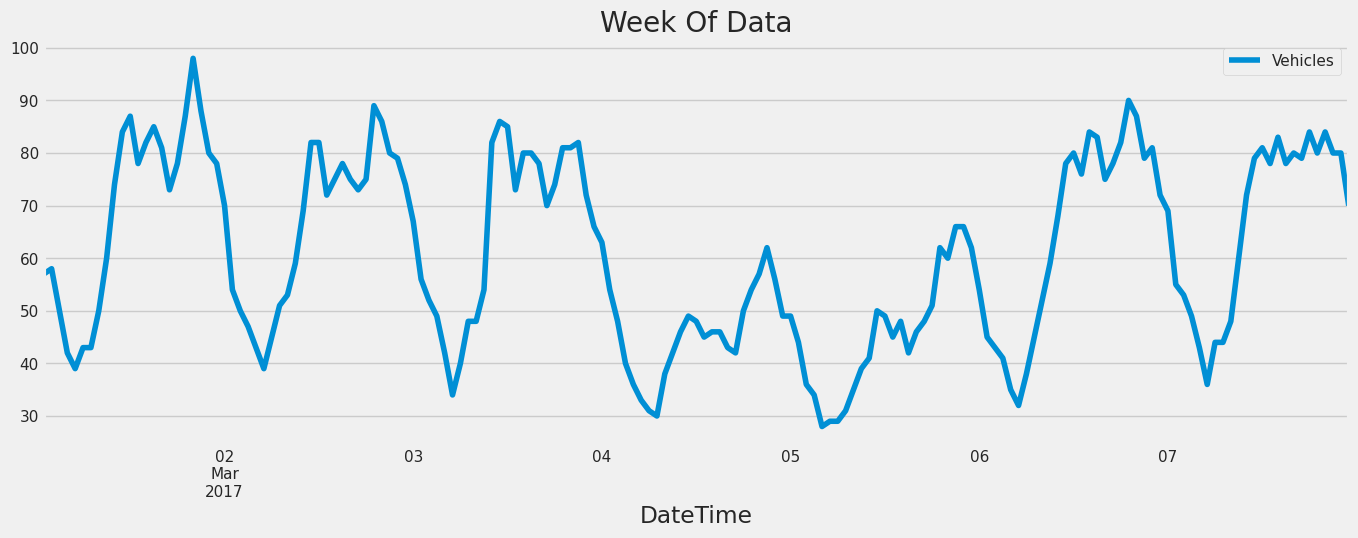

In [ ]:
df_1.loc[(df_1.index > '03-01-2017') & (df_1.index < '03-08-2017')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Feature Creation

In [ ]:
def create_features(df_1):
    """
    Create time series features based on time series index.
    """
    df_1= df_1.copy()
    df_1['hour'] = df_1.index.hour
    df_1['dayofweek'] = df_1.index.dayofweek
    df_1['quarter'] = df_1.index.quarter
    df_1['month'] = df_1.index.month
    df_1['year'] = df_1.index.year
    df_1['dayofyear'] = df_1.index.dayofyear
    df_1['dayofmonth'] = df_1.index.day
    df_1['weekofyear'] = df_1.index.isocalendar().week
    return df_1

df_1= create_features(df_1)

### Visualize our Feature / Target Relationship

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_1, x='hour', y='Vehicles')
ax.set_title('Vehicles by Hour')
plt.show()

<ipython-input-73-ce795586927a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1, x='month', y='Vehicles', palette='Blues')


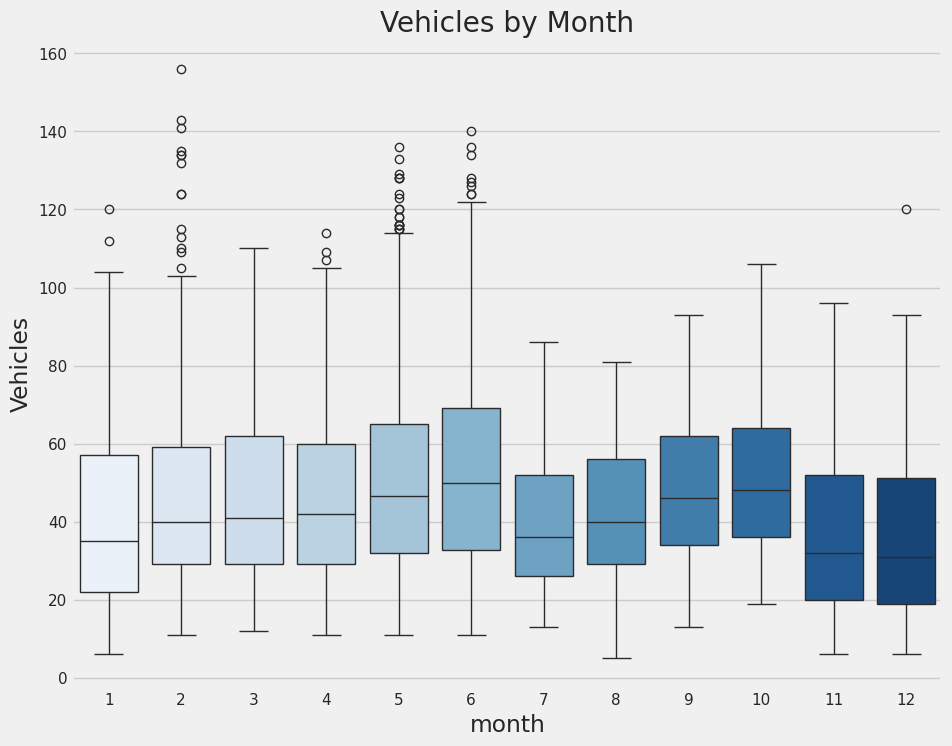

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_1, x='month', y='Vehicles', palette='Blues')
ax.set_title('Vehicles by Month')
plt.show()

### Create our Model

In [ ]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth','weekofyear']
TARGET = 'Vehicles'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:43.09373	validation_1-rmse:70.06581
[100]	validation_0-rmse:18.84460	validation_1-rmse:35.01821


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:30:11] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:10.56758	validation_1-rmse:21.75277
[300]	validation_0-rmse:7.61141	validation_1-rmse:16.32674
[400]	validation_0-rmse:6.49843	validation_1-rmse:13.84280
[500]	validation_0-rmse:5.98069	validation_1-rmse:12.75299
[600]	validation_0-rmse:5.69388	validation_1-rmse:12.24555
[700]	validation_0-rmse:5.50395	validation_1-rmse:11.91245
[800]	validation_0-rmse:5.35566	validation_1-rmse:11.60300
[900]	validation_0-rmse:5.23127	validation_1-rmse:11.37320
[999]	validation_0-rmse:5.13167	validation_1-rmse:11.16183


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

### Feature Importance

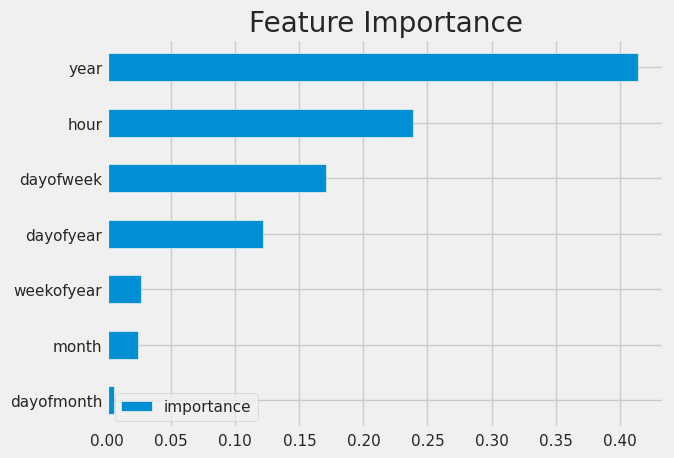

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

### Forecast on Test

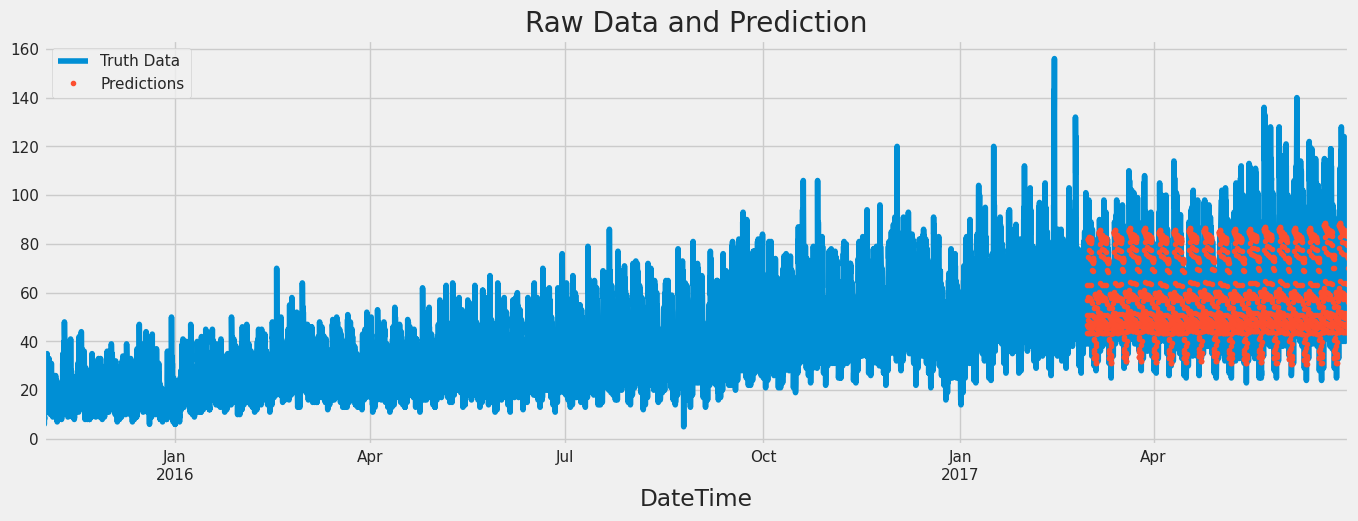

In [ ]:
# Forecast on Test
test['prediction'] = reg.predict(X_test)

# Reset index of both dataframes before merging to avoid index mismatch
df_1 = df_1.reset_index()
test = test.reset_index()

# Merge based on shared columns, if any, or on the 'DateTime' column if it exists in both
# Assuming 'DateTime' exists in both:
df_1 = pd.merge(df_1, test[['DateTime', 'prediction']], on='DateTime', how='left')

# Set 'DateTime' back as index if needed
df_1 = df_1.set_index('DateTime')

ax = df_1[['Vehicles']].plot(figsize=(15, 5))
df_1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

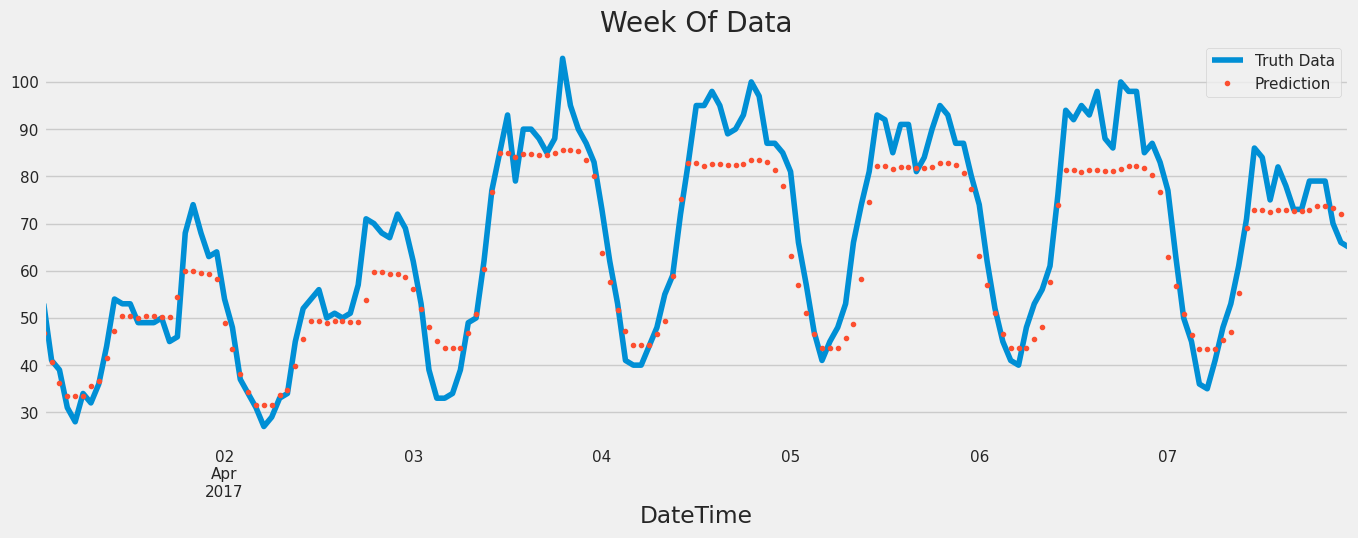

In [ ]:
ax = df_1.loc[(df_1.index > '04-01-2017') & (df_1.index < '04-08-2017')]['Vehicles'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df_1.loc[(df_1.index > '04-01-2017') & (df_1.index < '04-08-2017')]['prediction'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

### Model Evaluation

In [ ]:
mae = mean_absolute_error(test['Vehicles'], test['prediction'])
mse = mean_squared_error(test['Vehicles'], test['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Vehicles'], test['prediction'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 7.9810
MSE: 124.5865
RMSE: 11.1618
R² Score: 0.7764


### Calculate Error

In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test['DateTime']
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2017-06-06 18:00:00    56.525551
2017-06-06 19:00:00    51.745651
2017-06-06 17:00:00    50.890717
2017-05-22 11:00:00    49.912346
2017-05-01 16:00:00    49.527763
2017-05-22 19:00:00    46.084900
2017-05-25 11:00:00    45.429352
2017-05-01 13:00:00    44.152046
2017-06-06 16:00:00    43.890717
2017-05-22 12:00:00    42.912346
Name: error, dtype: float64

## XGBoost Advanced Methods

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Loading Dataset

In [ ]:
df = pd.read_csv('traffic.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

### Outlier Analysis and removal

<Axes: ylabel='Frequency'>

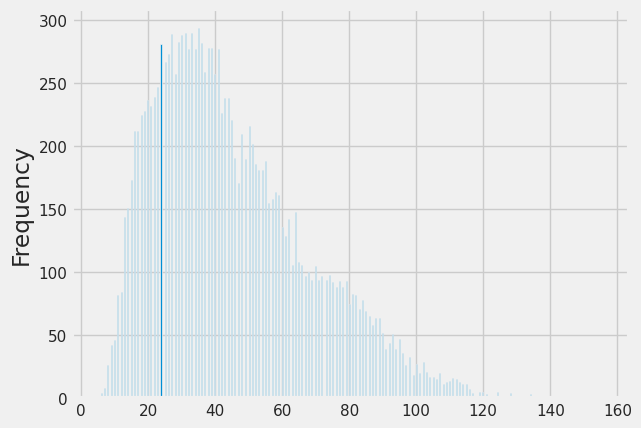

In [ ]:
df_1 = df[df['Junction']==1]
df_1['Vehicles'].plot(kind='hist', bins=500)

### Time Series Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)
df_1 = df_1.sort_index()

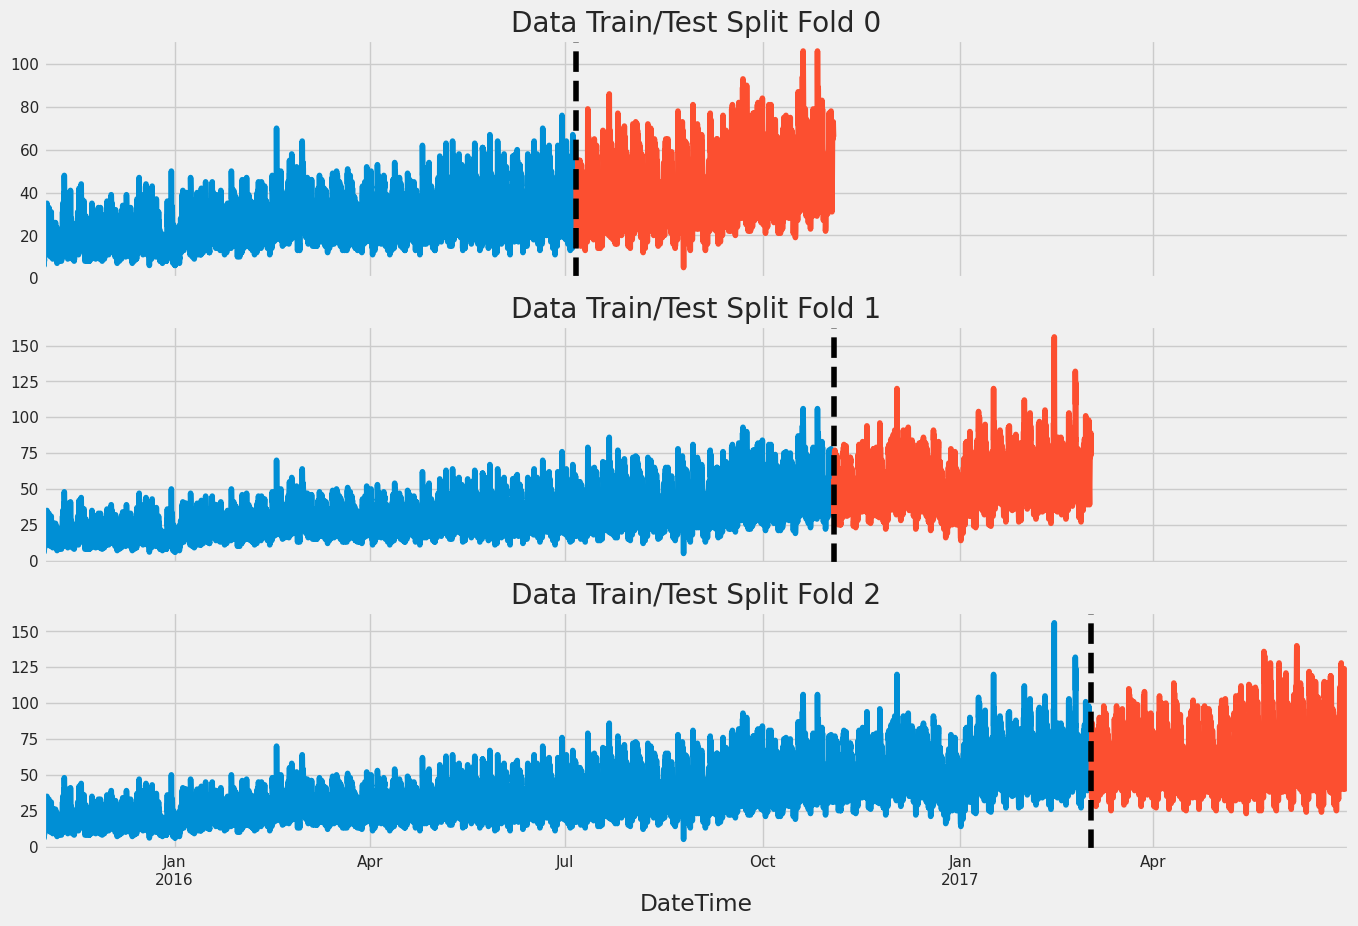

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_1):
    train = df_1.iloc[train_idx]
    test = df_1.iloc[val_idx]
    train['Vehicles'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['Vehicles'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

### Forecasting Horizon

In [ ]:
def create_features(df_1):
    """
    Create time series features based on time series index.
    """
    df_1= df_1.copy()
    df_1['hour'] = df_1.index.hour
    df_1['dayofweek'] = df_1.index.dayofweek
    df_1['quarter'] = df_1.index.quarter
    df_1['month'] = df_1.index.month
    df_1['year'] = df_1.index.year
    df_1['dayofyear'] = df_1.index.dayofyear
    df_1['dayofmonth'] = df_1.index.day
    df_1['weekofyear'] = df_1.index.isocalendar().week
    return df_1

df_1= create_features(df_1)

### Lag Features

In [ ]:
def add_lags(df_1):
    target_map = df_1['Vehicles'].to_dict()
    df_1['lag1'] = (df_1.index - pd.Timedelta('364 days')).map(target_map)
    df_1['lag2'] = (df_1.index - pd.Timedelta('728 days')).map(target_map)
    df_1['lag3'] = (df_1.index - pd.Timedelta('1092 days')).map(target_map)
    return df_1

In [ ]:
df_1 = add_lags(df_1)

### Train Using Cross Validation

In [ ]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*120*1, gap=24)
df_1 = df_1.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_1):
    train = df_1.iloc[train_idx]
    test = df_1.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth','weekofyear',
                'lag1','lag2','lag3']
    TARGET = 'Vehicles'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:30.05273	validation_1-rmse:47.47047
[100]	validation_0-rmse:12.36001	validation_1-rmse:29.08899


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:27] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:6.56759	validation_1-rmse:21.12116
[300]	validation_0-rmse:4.81859	validation_1-rmse:17.65425
[400]	validation_0-rmse:4.26225	validation_1-rmse:15.89192
[500]	validation_0-rmse:4.00819	validation_1-rmse:15.27398
[600]	validation_0-rmse:3.86439	validation_1-rmse:15.15472
[700]	validation_0-rmse:3.75674	validation_1-rmse:15.06692
[800]	validation_0-rmse:3.66831	validation_1-rmse:15.00489
[900]	validation_0-rmse:3.59844	validation_1-rmse:14.96338
[999]	validation_0-rmse:3.54479	validation_1-rmse:14.91308
[0]	validation_0-rmse:36.55584	validation_1-rmse:59.27228
[100]	validation_0-rmse:15.53221	validation_1-rmse:40.06634


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:32] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:8.31608	validation_1-rmse:32.59818
[300]	validation_0-rmse:5.99611	validation_1-rmse:29.73700
[400]	validation_0-rmse:5.13274	validation_1-rmse:28.87149
[500]	validation_0-rmse:4.77490	validation_1-rmse:28.31177
[600]	validation_0-rmse:4.58369	validation_1-rmse:28.03228
[700]	validation_0-rmse:4.43643	validation_1-rmse:28.00245
[771]	validation_0-rmse:4.35772	validation_1-rmse:28.00526
[0]	validation_0-rmse:43.16158	validation_1-rmse:70.05636


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:34] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:18.56809	validation_1-rmse:31.19276
[200]	validation_0-rmse:10.41866	validation_1-rmse:19.55033
[300]	validation_0-rmse:7.82930	validation_1-rmse:15.46666
[400]	validation_0-rmse:6.77020	validation_1-rmse:13.67987
[500]	validation_0-rmse:6.22596	validation_1-rmse:12.80086
[600]	validation_0-rmse:5.94091	validation_1-rmse:12.23684
[700]	validation_0-rmse:5.75676	validation_1-rmse:11.93332
[800]	validation_0-rmse:5.61727	validation_1-rmse:11.73313
[900]	validation_0-rmse:5.49153	validation_1-rmse:11.58907
[999]	validation_0-rmse:5.38808	validation_1-rmse:11.48738


In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 18.1332
Fold scores:[np.float64(14.912952891377001), np.float64(27.999162933916434), np.float64(11.487375378685085)]


### Retrain on all data

In [ ]:
df_1 = create_features(df_1)

FEATURES = ['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'dayofmonth','weekofyear',
            'lag1','lag2','lag3']
TARGET = 'Vehicles'

X_all = df_1[FEATURES]
y_all = df_1[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',
                       n_estimators=500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[0]	validation_0-rmse:49.66930
[100]	validation_0-rmse:20.65435


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:01:36] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:11.08863
[300]	validation_0-rmse:8.17346
[400]	validation_0-rmse:7.12959
[499]	validation_0-rmse:6.63727


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

### Forecast on Test

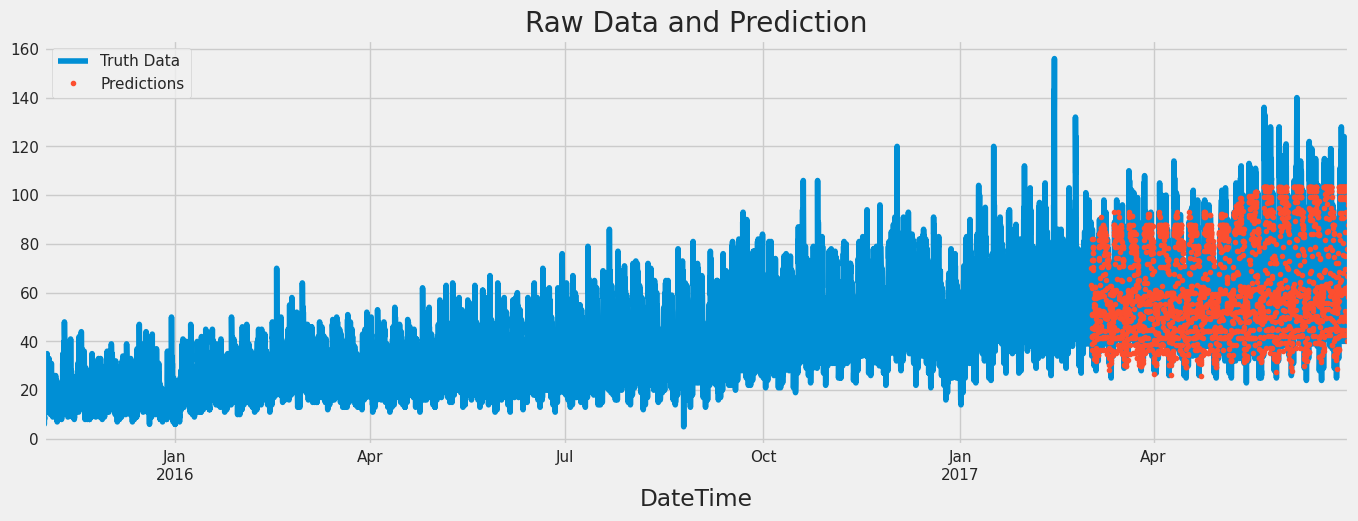

In [ ]:
# Forecast on Test
test['prediction'] = reg.predict(X_test)

# Reset index of both dataframes before merging to avoid index mismatch
df_1 = df_1.reset_index()
test = test.reset_index()

# Merge based on shared columns, if any, or on the 'DateTime' column if it exists in both
# Assuming 'DateTime' exists in both:
df_1 = pd.merge(df_1, test[['DateTime', 'prediction']], on='DateTime', how='left')

# Set 'DateTime' back as index if needed
df_1 = df_1.set_index('DateTime')

ax = df_1[['Vehicles']].plot(figsize=(15, 5))
df_1['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

### Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test['Vehicles'], test['prediction'])
mse = mean_squared_error(test['Vehicles'], test['prediction'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Vehicles'], test['prediction'])

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 5.4316
MSE: 52.5848
RMSE: 7.2515
R² Score: 0.9064


In [ ]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test['DateTime']
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2017-05-30 22:00:00    45.126190
2017-05-01 16:00:00    44.350349
2017-05-01 13:00:00    41.560280
2017-06-06 18:00:00    36.801231
2017-06-06 19:00:00    32.801231
2017-05-22 11:00:00    32.760345
2017-06-06 17:00:00    32.424469
2017-05-22 19:00:00    29.760345
2017-04-10 11:00:00    29.370209
2017-05-25 11:00:00    28.837929
Name: error, dtype: float64

In [ ]:
df_1.index.max()

Timestamp('2017-06-30 23:00:00')

In [ ]:
# Create future dataframe
future = pd.date_range('2017-06-30','2017-10-01', freq='1h')
future_df_1 = pd.DataFrame(index=future)
future_df_1['isFuture'] = True
df_1['isFuture'] = False
df_and_future_1 = pd.concat([df_1, future_df_1])
df_and_future_1 = create_features(df_and_future_1)
df_and_future_1 = add_lags(df_and_future_1)

In [ ]:
future_w_features_1 = df_and_future_1.query('isFuture').copy()

### Predict the future

In [ ]:
future_w_features_1['pred'] = reg.predict(future_w_features_1[FEATURES])

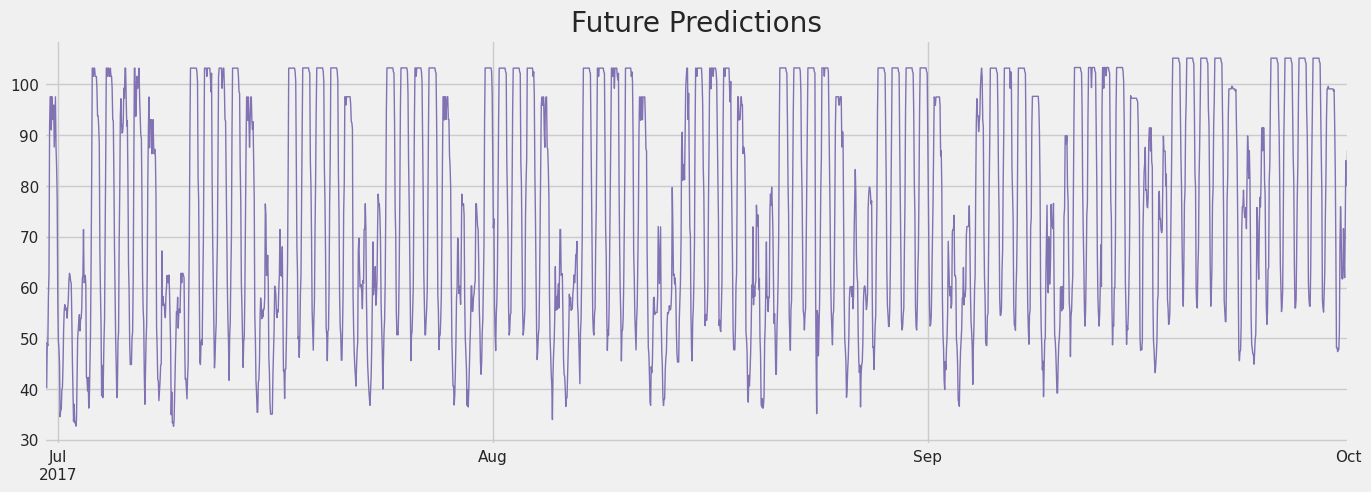

In [ ]:
future_w_features_1['pred'].plot(figsize=(15, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

## LSTM

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

### Load and preprocess

In [ ]:
df = pd.read_csv('traffic.csv')
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df[df["Junction"] == 1].copy()
df.set_index("DateTime", inplace=True)
df.sort_index(inplace=True)
df = df[["Vehicles"]]

### Scaling

In [ ]:
scaler = MinMaxScaler()
df["ScaledVehicles"] = scaler.fit_transform(df[["Vehicles"]])

In [ ]:
df[['Vehicles']].head()

Vehicles
DateTime                     
2015-11-01 00:00:00        15
2015-11-01 01:00:00        13
2015-11-01 02:00:00        10
2015-11-01 03:00:00         7
2015-11-01 04:00:00         9

In [ ]:
df['ScaledVehicles'].head()

DateTime
2015-11-01 00:00:00    0.066225
2015-11-01 01:00:00    0.052980
2015-11-01 02:00:00    0.033113
2015-11-01 03:00:00    0.013245
2015-11-01 04:00:00    0.026490
Name: ScaledVehicles, dtype: float64

### Create sequences

In [ ]:
sequence_length = 24
X, y = [], []
data = df["ScaledVehicles"].values

for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [ ]:
len(data)

14592

In [ ]:
X[:1]

array([[0.06622517, 0.05298013, 0.03311258, 0.01324503, 0.02649007,
        0.00662252, 0.02649007, 0.01986755, 0.0397351 , 0.04635762,
        0.06622517, 0.0794702 , 0.07284768, 0.06622517, 0.07284768,
        0.04635762, 0.04635762, 0.07284768, 0.0794702 , 0.09933775,
        0.0794702 , 0.09271523, 0.09933775, 0.06622517]])

In [ ]:
y[:5]

array([0.05960265, 0.04635762, 0.05960265, 0.04635762, 0.04635762])

### Train/Test split

In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

### Build LSTM Model

In [ ]:
model = Sequential([
    Input(shape=(24, 1)),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

### Train Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0194 - val_loss: 0.0135
Epoch 2/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0045 - val_loss: 0.0051
Epoch 3/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0029 - val_loss: 0.0041
Epoch 4/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 5/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 6/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 7/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 8/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 9/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 10/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 11/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 12/20
183/183 ━━━━━━━━━━━━━━━━━━━━ 

### Predict

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

### Evaluate Model

In [ ]:
mae = mean_absolute_error(y_test_actual, y_pred)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 4.6437
MSE: 42.0731
RMSE: 6.4864
R² Score: 0.9246


### Plot True vs Predicted

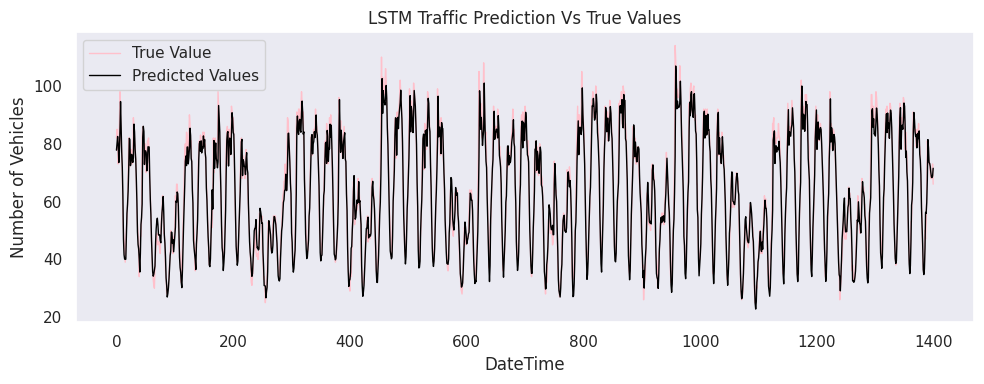

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test_actual[:1400], label="True Value", color='pink', linewidth=1)
plt.plot(y_pred[:1400], label="Predicted Values", color='black', linewidth=1)
plt.title("LSTM Traffic Prediction Vs True Values")
plt.xlabel("DateTime")
plt.ylabel("Number of Vehicles")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()